# Airbnb practice

In [1]:
#importing all libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
# https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb tutorial link
# reading the csv file and checking the first 10 lines
airbnb = pd.read_csv("AB_NYC_2019.csv")
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
#checking the amount of rows
len(airbnb)

48895

In [4]:
#checking the type of every column
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Understadning and Cleaning Data

In [5]:
#using 'sum' function will show us how many nulls are found in each column in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#dropping columns that are not significant
#inplace modifies the current dataframe
airbnb.drop(['id','host_name', 'last_review'], axis=1, inplace=True) 
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
#replacing all NaN values in 'reviews_per_month' with 0
#inplace modifies the current dataframe
airbnb.fillna({'reviews_per_month':0}, inplace=True)

In [8]:
airbnb.reviews_per_month.isnull().sum()

0

In [9]:
#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [11]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Exploring and Visualizing Data

In [12]:
# Now that we are ready for an exploration of our data.
# we can make a rule that we are going to be working from left to right.
# let's see what hosts (IDs) have the most listings on Airbnb platform and 
# taking advantage of this service.
# Series.value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
top_host = airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [13]:
# coming back to our dataset we can confirm our fidnings with already
# existing column called 'calculated_host_listings_count'
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

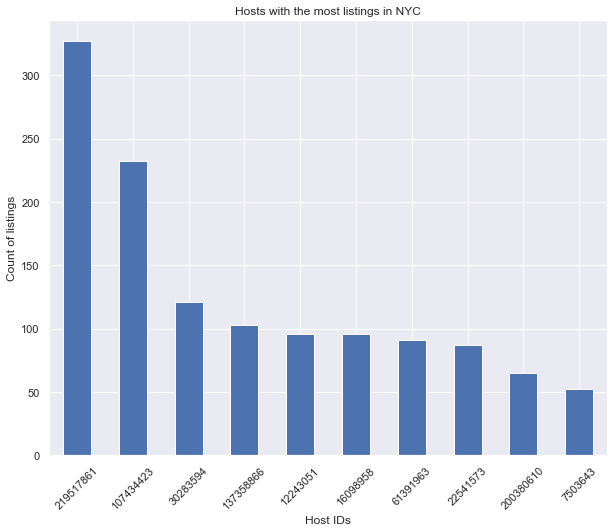

In [14]:
#setting figure size for future visualizations
#bar plot
sns.set(rc={'figure.figsize':(10,8)}) # figure size
viz_1=top_host.plot(kind='bar') # plot
viz_1.set_title('Hosts with the most listings in NYC') # title
viz_1.set_ylabel('Count of listings') # y label
viz_1.set_xlabel('Host IDs') #x label
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [15]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn'] #filter
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [16]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75]) #describe()
    i=i.iloc[3:] #list
    i.reset_index(inplace=True) #set a new index
    i.rename(columns={'index':'Stats'}, inplace=True) # rename the index
    p_l_b_n_2.append(i)

#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2 # Creating an alias
stat_df=[df.set_index('Stats') for df in stat_df] # setting Stats as new index for each dataframe
# DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False) → ’DataFrame’
stat_df=stat_df[0].join(stat_df[1:]) #merging all dataframes
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

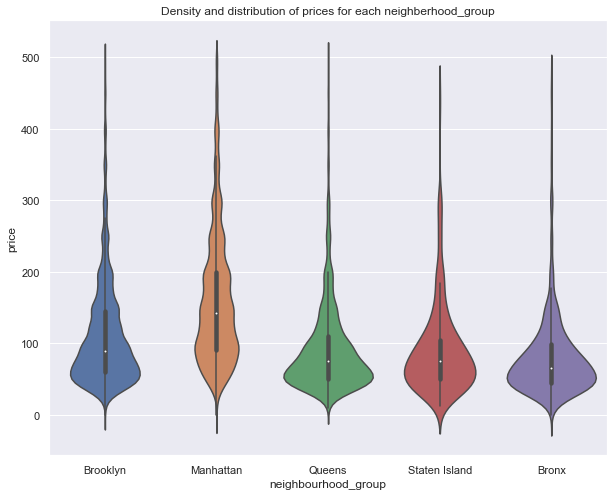

In [17]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [18]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [19]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10) # occurrences 

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

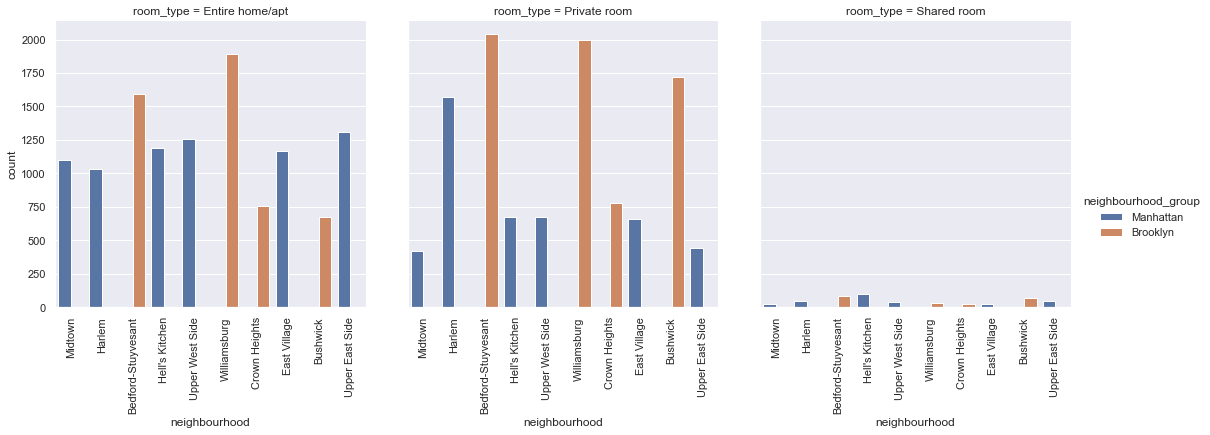

In [20]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

In [21]:
# tipo de habitación, frecuencia, 10 barrios más populares 

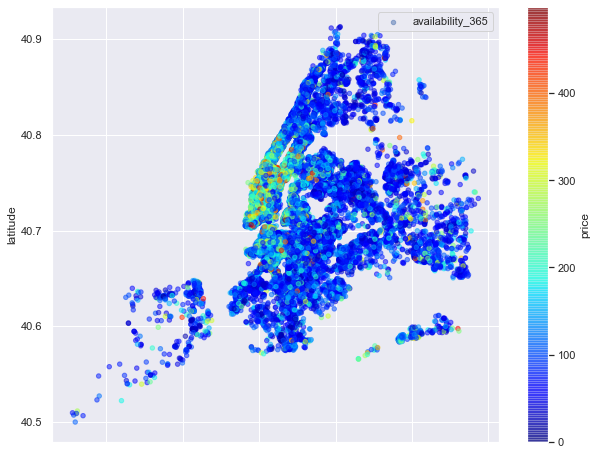

In [31]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out
#cmap color palette
#alpha = opacity
#colorbar=True
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.5, figsize=(10,8))
viz_4.legend()

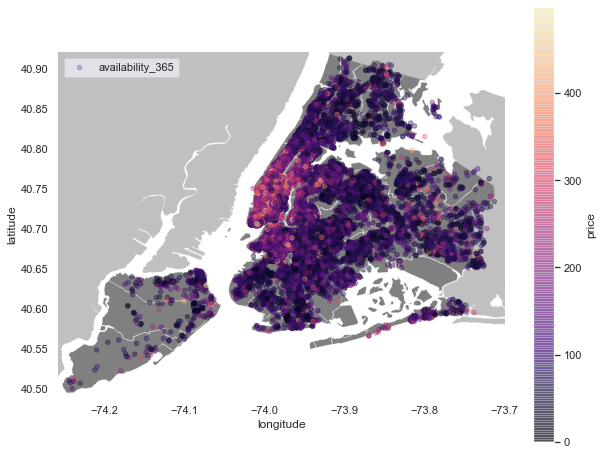

In [53]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i) #read an image
#scaling the image based on the latitude and longitude max and mins for proper output
#nyc_img The image data.
#zorder: z-index
#extent: put the image in the same range
plt.imshow(nyc_img,zorder=4,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca() #get current axes. to plot in the same graph
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('magma'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [61]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name) #appending names
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split() #list of every name
    print(spl)
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()  #lowercase
        _names_for_count_.append(word) #appending to new list

['Clean', '&', 'quiet', 'apt', 'home', 'by', 'the', 'park']
['Skylit', 'Midtown', 'Castle']
['THE', 'VILLAGE', 'OF', 'HARLEM....NEW', 'YORK', '!']
['Cozy', 'Entire', 'Floor', 'of', 'Brownstone']
['Entire', 'Apt:', 'Spacious', 'Studio/Loft', 'by', 'central', 'park']
['Large', 'Cozy', '1', 'BR', 'Apartment', 'In', 'Midtown', 'East']
['BlissArtsSpace!']
['Large', 'Furnished', 'Room', 'Near', "B'way"]
['Cozy', 'Clean', 'Guest', 'Room', '-', 'Family', 'Apt']
['Cute', '&', 'Cozy', 'Lower', 'East', 'Side', '1', 'bdrm']
['Beautiful', '1br', 'on', 'Upper', 'West', 'Side']
['Central', 'Manhattan/near', 'Broadway']
['Lovely', 'Room', '1,', 'Garden,', 'Best', 'Area,', 'Legal', 'rental']
['Wonderful', 'Guest', 'Bedroom', 'in', 'Manhattan', 'for', 'SINGLES']
['West', 'Village', 'Nest', '-', 'Superhost']
['Only', '2', 'stops', 'to', 'Manhattan', 'studio']
['Perfect', 'for', 'Your', 'Parents', '+', 'Garden']
['Chelsea', 'Perfect']
['Hip', 'Historic', 'Brownstone', 'Apartment', 'with', 'Backyard']
['Hu

['Garden', 'Oasis', 'in', 'the', '♥️', 'of', 'NYC', '|', 'Steps', 'to', 'Times', 'Sq!']
['Brownstone', 'Home', '-', 'BEST', 'BKLYN', 'BLOCK!']
['Convenient,', 'Central,', 'Comfortable']
['Charming', 'triplex', 'in', 'NYC', 'brownstone!']
['Cozy', '1BR', 'apart.', 'in', 'Prospect', 'Hts,', 'BK']
['Queens', 'Quality', 'Convenient', 'Apartment']
['Gorgeous', '1', 'Bdrm', 'Haven/Shared', 'Ktchn']
['Hip', 'Brooklyn', 'Photo', 'Studio', 'Loft!']
['Chateau', 'Gowanus']
['HUGE', 'East', 'Village', '2', 'Bd', 'w/Priv', 'Yard']
['Cozy', 'Comfortable', 'Friendly', '&', 'Cheap!']
['1', 'FLOOR', 'OF', 'A', 'BROWNSTONE', 'WITH', 'GARDEN']
['Full-Service', 'Studio', 'Apt', 'in', 'Brownstone/Townhouse']
['2', 'BED', 'TriBeCa,', 'Beautiful-Renovated!']
['Small', 'Private', 'Room', '#', '1', 'with', 'Window']
['Full', 'Apt!', 'L', 'Train', 'On', 'The', 'Corner!!']
['Great', 'house', 'in', 'Williamsburg']
['1', 'BR', 'Apartment', 'near', 'Prospect', 'Park!']
['Brooklyn', 'Carriage', 'House']
['Big', 'Sun

['Private', 'Bed', '&', 'Bath', 'in', 'a', 'townhouse:Charm-Calm-Cozy-']
['Charming', 'Brwnstn', 'Duplex', 'sleeps', '5']
['West', 'Village/SoHo', 'Prvt', 'Rm']
['small', 'room', 'in', 'bedstuy', 'P']
['Huge', 'Loft', 'In', 'South', 'Williamsburg']
['Private', 'Huge', '2br', 'Williamsburg', 'Artist', 'Apartment!']
['New', 'York', 'City', 'Historical', 'Brownstone', 'Ground', 'Floor']
['Gorgeous', 'apartment', 'by', 'Grand', 'Central']
['Private,', 'quiet', 'Antique', 'room', 'on', 'first', 'floor', 'duplex']
['Best', 'location', 'in', 'Brooklyn!']
['Garden', 'Rowhouse', 'Duplex-2', 'bd/3', 'bth']
['Rare', 'large', 'modern', 'garden', 'studio,', 'comfy;', 'location!']
['Private', 'room', 'in', '2', 'bedroom', 'apartment']
['Private', 'fits', '3', 'ppl.', 'Prospect', 'Park']
['Huge', 'Room', 'with', 'View', 'in', 'Bushwick!']
['Designer', 'Space', 'For', 'Families:', '2', 'Bed', '|', '2', 'Bath']
['Bright', 'Studio', 'Apt', 'on', 'Prospect', 'Park']
['Garden', 'Apartment,', 'Ft.', 'Green

['Huge', 'duplex', 'in', 'chic', 'area', 'of', 'BK', 'with', 'deck.']
['cozy', 'room', '/female', 'guests']
['Columbus', 'Circle/Central', 'Park', '-', 'WIFI']
['Lovely', 'Private', 'Bedroom', 'in', '2BR', 'Apt']
['Room', 'in', 'Duplex', 'Apartment!!']
['Chic', 'Mid', 'Century', 'Modern', '1', 'BD', '+Gym', '+Laundry', '+AC']
['Cozy', 'bedroom', 'in', 'shared', '2br', 'apt']
['Sunny,', 'colorful,', '1BD', 'close', 'to', 'city']
['Large', '&', 'Stunning', '5th', 'Ave', '1', 'BR']
['PRIVATE', 'ROOM', 'IN', 'NEW', 'YORK', 'MANHATTAN']
['1', 'bedroom', 'in', 'the', 'heart', 'of', 'the', 'UWS']
['Ditmas', 'Park', '1BR']
['Charming', '1br', 'apartment', 'in', 'Astoria']
['Large', 'New', 'York', 'style', 'loft']
['Bright/Sunny/1block', 'from', 'Bedfordsub']
['Beautiful', 'Studio', 'Suite!', 'Upper', 'East']
['Sunny', 'Bedford', 'Stuyvesant', 'Townhouse']
['Spacious', '1', 'BR', 'apt', 'in', 'the', 'UWS']
['Beautiful', 'Furnished', 'Room!']
['Sunny,', 'ample,', 'quiet', 'w/balcony!']
['Cozy', 

['Gorgeous', 'Park', 'Slope', 'Space', '&', 'Light']
['Cool', 'room', 'while', "I'm", 'away!']
['Spacious', '2', 'story', 'Apt', 'in', 'Midtown!!']
['Private+Cozy', 'Room', 'w/', 'Superhost', '($0', 'Cleaning', 'Fee)!']
['Idealistic', 'Inwood']
['Unique', 'Full-Floor', '2br/2bath', 'in', 'the', 'Heart', 'of', 'SoHo']
['Clean', 'private', 'room', 'in', 'safe', 'area', 'near', 'Manhattan']
["Artist's", 'Studio', 'Apartment']
['Stylish', '1', 'BedRoom', 'very', 'quiet', 'Upper', 'East', 'Side', 'Apt!']
['Manhattan', '1-Bedroom,', 'East', 'Village']
['Large', 'and', 'furnished']
['Greenwich', 'Village', 'Living!']
['Park', "Slope's", '-', 'Pied', 'à', 'Terre', '(1-Bedroom', 'Apt)']
['Sunny', '1', 'Bedroom', '-Financial', 'District']
['1', 'Br', 'Near', 'Empire', 'State', 'Building']
['The', 'White', 'House']
['Prime', 'W.', 'Village', 'location', '1', 'bdrm']
['Charming', 'Soho', 'One', 'Bedroom', '+', 'Loft']
['Private', 'Room', 'in', 'Brooklyn']
['Spacious', 'South', 'Slope', 'apartment'

['Excellent', 'Midtown', 'Location!']
['Cozy', 'Garden', 'Flat.']
['Spacious', 'East', 'Village', '1', 'Bedroom']
['Spacious', '1BR', 'Bushwick', 'Surfers', 'Loft!']
['Beautiful', 'room', 'in', 'Manhattan']
['Cozy', '1', 'Bdrm', 'Greenpoint-Williamsburg']
['Remsen', 'Village', 'Rental']
['Large,', 'Furnished', 'East', 'Village', 'Room']
['Master', 'Bedroom', 'available', 'with', 'en', 'suite', 'bathroom.']
['NEW', 'YORK', 'CITY!!!', 'LOCATION', 'LOCATION!']
['Fully', 'Furnished', 'Brownstone', 'Bedroom']
['Cozy,', 'Sunny,', 'Clean', 'UES', 'Home', 'in', 'central', 'location']
['SUN', 'FILLED', '1BR', 'in', 'ARTSY', 'FORT', 'GREENE']
['Comfortable', 'Crown', 'Heights', 'Room']
['Sleek', 'Bushwick', 'Loft']
['Cozy', 'room', 'in', 'a', 'newly', 'renovated', 'apt!']
['Bohemian', 'Studio', 'Loft', 'in', 'Brooklyn']
['Large', 'Bohemian', 'Studio-', 'Gramercy!']
['Mod.', 'Apartment', 'NYC', 'w/', 'Outdoor', 'Space']
['Apt', 'available', '-', 'Best', 'NYC', 'Location']
['Quiet', 'Cottage', 'wi

['A', 'large', '1-bedroom', 'apartment']
['Cheap', '&', 'Basic', 'Temporary', 'Airbed', 'Room']
['Studio', 'apartment', 'in', 'the', 'heart', 'of', 'Chelsea']
['Duplex', '3BR', 'SOHO', 'Penthouse', 'w.Terrace']
['Best', 'location!', 'Chelsea/West', 'Village/Meatpacking']
['Spacious', 'private', 'room']
['Wburg', '1', 'bedroom', '-', 'Spacious', '&', 'Sunny']
['Cozy,', 'single', 'bed', 'room.15min', 'to', 'NYC']
['Brooklyn,', 'Sundrenched', '&', 'Peaceful']
['Master', 'bedroom', '+', 'private', 'bathroom']
['Huge&Bright', 'Room', 'in', 'Greenwich', 'Vill.']
['BK', 'Heights', 'Apartment', 'for', 'cat', 'lovers']
['Industrial', 'Flex', '2br', 'duplex', 'Loft', 'in', 'Brooklyn']
['Cozy', 'home', 'in', 'Williamsburg!']
['A', 'beautiful', 'and', 'friendly', 'beach', 'area']
['Live', 'like', 'a', 'real', 'New', 'Yorker', 'right', 'by', 'Central', 'Park']
['Spacious', 'Duplex', 'for', 'Spring', 'Retreat']
['2', 'Bedroom', 'fully', 'furnished', 'apt,Clinton', 'Hill', 'BK']
['Private', 'Artisiti

['Lg', 'Prospect', 'Hts', 'Room', 'at', 'Brooklyn&Breakfast']
['Beautiful', 'Home', 'for', 'seasonal', 'rental']
['Private', 'room', 'in', 'WILLIAMSBURG', 'LOFT']
['Private', 'Room', 'in', 'Shared', 'Apartment']
["Brooklyn's", 'finest', 'by', 'Prospect', 'Park']
['Minimal', 'Central', 'Chelsea', 'Studio']
['Unique', "Artists'", 'Studio', 'in', 'Manhattan']
['Large', '1', 'Bdrm', 'for', '5;', 'close', 'to', "Roberta's", '/', 'Morgan', 'L']
['Large', 'One', 'Bedroom', 'with', 'Backyard']
['Luxury', 'Upper', 'East', 'Side', 'Apartment']
['NEW', 'Modern', 'Brooklyn', '1BR', 'Apt!']
['One', 'bedroom', 'apartment']
['Cozy', 'Sublet', 'in', 'Brooklyn']
['East', 'Williamsburg', '/Bushwick', 'Room']
['Large', 'private', 'bed/bath', 'by', 'Times', 'Sq']
['Experience', 'Brooklyn']
['Large', 'Private', 'Room', 'in', 'Greenpoint/', 'Williamsburg']
['Extraordinary', 'One', 'Bedroom', 'Apartment']
['Townhouse', 'Bonus', 'Room', 'w/Private', 'Bath']
['Brooklyn', 'Brownstone', 'In', 'Historic', 'Bed', 

['Midcentury', 'Modern', 'Duplex', '3BR/2BA', 'in', 'Times', 'Square']
['Charming', 'private', 'bedroom', 'Park', 'Slope']
['Huge', 'Apt', 'on', 'Central', 'Park', 'South']
['$1,400/month', 'Summer', 'Rental:', 'Spacious', 'One', 'Bdrm']
['Private', 'Studio', 'Apartment', 'in', 'Harlem']
['Spacious', 'Room', 'in', 'East', 'Willamsburg']
['huge,', 'clean', 'and', 'great', 'loft', 'space']
['Bright,', 'cozy', 'East', 'Village', 'apartment']
['ENTERING', 'WINTER', 'FESTIVALS']
['Private', 'room', 'in', 'Upper', 'West', 'Side']
['20', 'mins', 'to', 'Manhattan', 'Entire', 'Studio']
['Apartment', 'on', 'upper', 'west', 'side,', 'NYC']
['Lg', 'private', 'room', 'minutes', 'from', 'subway']
['Sunny', 'Duplex', 'w/Private', 'Roof', 'Deck', 'Monthly', 'Rental']
['Spacious', '+', 'Cozy', 'Loft', 'in', 'Williamsburg']
['Rain', 'or', 'Shine', 'Studios:', 'Dedicated', 'to', 'Production']
['Great', 'sun', 'drenched', 'room', 'near', 'park!']
['Cozy', 'Studio', 'for', 'your', 'Business', 'Trip']
['Spa

['☆', 'Easy', 'Access', 'To', 'The', 'Best', 'Of', 'Brooklyn', '☆']
['A', 'Quiet', 'Room', 'in', 'the', 'West', 'Village']
['Private', 'room', 'in', 'Greenpoint,', 'BK']
['1200', 'SQFT', 'Open', 'Loft', 'Williamsburg']
['Sun-drenched', 'SoHo', 'Duplex', 'Loft']
['Big', 'Studio', 'W/', 'Prive', 'Patio', '+Amenity']
['Awesome', 'room', 'in', '2br', 'design', 'Apartment', 'in', 'LES']
['Large', '1', 'Bedroom', 'Apartment']
['Sunny', 'Manhattan', 'Apartment!!']
['Parkside', 'Brooklyn', 'Brownstone']
['Private', 'queen', 'room', '-', "Hell's", 'Kitchen']
['Beautiful', '1BR', 'NYC']
['540', 'Main', 'Street,', 'Apt', '428']
['Quiet', 'and', 'large', 'one', 'bedroom']
['Room', 'for', 'Female-Upper', 'West', 'Side']
['Cute', 'space', 'in', 'Manhattan']
['Bright', 'new', 'apt', 'in', 'a', 'luxury', 'building']
['Perfect', 'West', 'Village', 'Apartment']
['Cozy', 'room', 'in', 'a', 'big', 'house!']
['1', 'Full', 'Size', 'Bed', 'with', 'Bike', 'Rental']
['Two', 'Bedroom', 'next', 'to', 'Central', 

['Gorgeous', 'Greenpoint:', 'Sublet', 'April', '10th', '-', '27th']
['FT', 'Greene', 'Flat', 'Private', 'Entrance']
['Spacious', 'room', 'in', 'a', '3', 'bedroom', 'Apt']
['Bright', 'Williamsburg', '1', 'BD,', 'Bedford', 'L']
['East', 'Village', '2bdr/1bath']
['Chic', '1-BR', 'in', 'Lovely', 'Park', 'Slope']
['Spacious', 'Room', 'Near', 'Public', 'Transport', 'and', 'shopping']
['Huge', 'Quiet', 'Fun', 'Spot', 'In', 'Heart', 'o', 'LES!']
['This', 'quaint', '2', 'bedroom', 'apart', 'in', 'NYC']
['Bright', 'w/', 'stunning', 'Manhattan', 'views']
['The', 'Quintessential', 'Bushwick', 'Loft:', 'The', 'Brig']
['Historic', 'Greenwich', 'Village', 'apt.']
['Madison', 'Square', 'Park', 'Luxury', 'Apt']
['Spacious', '2BR', 'apt', 'with', 'deck']
['Cozy', '1', 'bedroom', 'bricked', 'wall', 'loft']
['well', 'lit', 'East', 'Williamsburg', 'apt.']
['Garden', 'Apartment', 'with', 'Backyard', 'in', 'Carroll', 'Gardens']
['Enjoy', 'One', 'of', 'a', 'Kind', 'Spectacular', 'NYC', 'Views']
['Beautiful', 

['Private', 'Bedroom', 'in', '2', 'BR', 'apartment']
['Furnished', 'FUNky', 'room', 'in', 'artist', 'loft']
['Spacious', 'Studio', '15', 'min', 'to', 'Manhattan']
['Comfortable', 'and', 'cozy', 'Apartment', 'in', 'Manhattan']
['Great', 'Harlem', 'room']
['Room', 'for', 'two', 'in', 'NYC!']
['Large', 'and', 'sunny', 'BR', 'Bushwick']
['Artist', 'Loft', 'East', 'Williamsburg']
['clean', 'and', 'tidy', 'separated', 'livingroom']
['Lightfull', 'and', 'Quiet', 'apartment', '15', 'min', 'to', 'Manhattan.']
['Large', 'Modern', 'Studio', 'Apartment', 'UES']
['Bright', '&', 'Spacious', 'E.', 'Village', '1', 'Bdrm']
['Cozy', 'room', 'in', 'heart', 'of', 'Williamsburg']
['Gorgeous', 'new', 'apartment', 'with', 'amazing', 'views']
['Private', 'bedroom', 'in', 'Crown', 'Heights!']
['NW..Comfortable', 'Room', 'All', 'Inclusive']
['S...Comfortable', 'Room', 'All', 'Inclusive']
['Bright', '&', 'Spacious', 'Studio', 'Apartment']
['Your', 'Hudson', 'Heights', 'Hideaway', '◔‿◔']
['Large,', 'Private', 'Be

['Luxe', '&', 'Spacious', 'Williamsburg', 'Studio']
['Doorman', 'Chelsea', 'One', 'Bedroom-', 'Convenient', 'and', 'Fun!']
['Beautiful', 'Brownstone', 'Triplex']
['Lovely,', 'Sunny', 'Studio', 'near', 'Central', 'Park', 'in', 'UWS']
['Sunny', 'Manhattan', 'Apt', '(week', '/', 'month', 'discounts)']
['private', 'yard', '&', 'apt-near', 'metro,direct', 'to', 'Manhattan']
['Convenient', 'Financial', 'District', 'Studio']
['Spacious', 'and', 'cozy', 'Lower', 'East', 'Side', 'bedroom']
['Classic', 'Gramercy', 'Studio']
['Beautiful', 'and', 'huge', 'room.']
['Cozy,', 'Quiet', 'Neat', 'Room', 'for', 'You!']
['Cute', 'private', 'room', 'perfect', 'as', 'a', 'travel', 'base']
['Cozy', 'Harlem', 'Haven']
['Newly', 'Renovated,', 'Cozy', 'Brooklyn', 'Room', 'w/terrace']
['Spacious', 'sunny', 'room', 'in', 'Queens']
['Cozy', 'private', 'Studio,', 'easy', '60', 'min.', 'commute', 'to', 'NYC!']
['Upper', 'West', 'Side', 'Classic', 'WHOLE', '2', 'Bedroom', 'apt']
['Big', 'West', 'Harlem/Hamilton', 'He

['Quaint', 'garden', 'apartment', 'in', 'Clinton', 'Hill']
['Gorgeous', 'Loft']
['Cozy', 'master', 'room,17mins', 'to', 'midtown', 'by', 'EFMR7', 'trains']
['Sunny', '1Bedroom', 'in', 'the', '❤', 'of', 'the', 'city']
['Unique', 'Designer', '1BR', 'in', 'Best', 'NYC', 'Neighborhood']
['Madison', 'home-']
['Big', '&', 'Bright', 'Hamilton', 'Heights', 'Manhattan', 'Bedroom']
['2BR', 'fully', 'furnished', 'in', 'the', 'UES', '-', 'minimum', '30', 'days']
['Private', 'Small', 'Room', '4']
['near', 'metro']
['Spacious', 'Studio', 'Room', 'in', 'Flushing,', 'Queens']
['Private', 'Suite', '·', 'Sparkling', 'Clean', '·', 'Memory', 'Foam']
['Entire', '1', 'Bedroom', 'in', 'Gramercy']
['Bright,', 'Modern,', 'Cozy', 'Room', 'in', 'Brooklyn', "Artist's", 'Apt']
['纽约之家(SunnyHome5)']
['Spacious', '1', 'bedroom', 'with', 'Private', 'Deck', 'with', 'Grill']
['Gorgeous', 'Brooklyn', 'Studio', 'Apartment']
['Amazing', 'Luxury', 'located', 'in', 'the', 'Middle', 'of', 'Manhattan!']
['Cozy', 'Studio', 'in'

['Huge', 'Bedroom', 'in', 'the', 'Upper', 'West', 'near', 'Central', 'Park']
['Apartment', '5A']
['Luxury', 'doorman', 'building', 'great', 'view', 'NYC']
['Charming', 'apt', 'in', 'Bed-Study!', 'Central', 'location']
['Onebedroom', 'apartment', 'with', 'park', 'view']
['Stylish', '1', 'Bedroom', 'in', 'heart', 'of', 'East', 'Village']
['Cozy', 'private', 'studio', '10m', 'fr', 'LGA', '30m', 'to', 'Manhattan']
['A', 'Touch', 'of', 'Modern']
['Cozy', 'home', 'away', 'from', 'home']
['Spacious', 'apartment', 'in', 'Brooklyn']
['Private', 'Room', 'in', 'Bronx', 'NY,', 'Manhattan']
['3', 'Cozy', 'Zen', 'Rooms', 'In', 'Beautiful', 'Apt.']
['Spacious', 'Modern', '1-bedroom', 'in', 'Greenpoint', 'w/TV,', 'heat']
['Spacious', '1', 'Bedroom', 'Apt', 'in', 'the', 'heart', 'of', 'Harlem']
['MARTIAL', 'LOFT', '3:', 'REDEMPTION', '(upstairs,', '1st', 'room)']
['Times', 'Sqaure', 'Gem']
['Spacious,', 'quiet', '1', 'br', 'apt', 'in', 'beautiful', 'Inwood!']
['Brooklyn', 'Getaway']
['King', 'sized', '

['Light-filled', 'Bowery', '1BD', 'Apartment']
['Charming', 'Studio', 'In', 'Historic', 'Home']
['Gorgeous', 'Luxury', '1', 'Brd', 'Apt', 'in', 'Trendy', 'West', 'Village!']
['Cozy', 'and', 'Sunny', '2', 'bedroom', 'apartment']
['Airy', 'Inwood', 'Apartment']
['Historic', 'Brownstone', 'in', 'Harlem']
['Guest', 'Room', 'in', 'High', 'Ceiling', 'Duplex,', 'Williamsburg!', '2']
['Beautiful', '2', 'Bedroom', 'Apartment', 'Woodside,', 'Queens,', 'NY']
['Charming', 'Apartment']
['1', 'Bedroom', 'in', 'Beautiful/Spacious', 'Bushwick', 'Apt']
['Huge', 'Comfy', 'Studio', 'with', 'Private', 'Bath,', 'Near', 'Metro']
['Large', 'Studio', 'one', 'block', 'from', 'Times', 'Square']
['Newly', 'renovated', 'modern', 'Apt', 'in', 'heart', 'of', 'Astoria', 'NY']
['Sunny', 'room', 'in', 'a', 'shared', 'appartement', 'in', 'Bushwick']
['Sunny,', 'Beautiful,', 'Comforting', 'Greenpoint', 'Apartment']
['Peaceful', 'room', 'in', 'hip', 'BK', 'area', '15', 'min', 'to', 'Manhattan']
['Perfectly', 'Central', '

["Joy's", 'Luxury', 'Apartment', 'with', 'Free', 'Parking', 'Space']
['UES', 'one', 'bedroom']
['☆☆☆Extravagant', "Couple's", 'Escape☆☆☆']
['Private', 'Williamsburg', 'Room', '1', 'Block', 'from', 'Bedford', 'L']
['Beautiful', 'Apartment', 'in', 'the', 'Heart', 'of', 'Chelsea']
['Cozy', 'Room', 'in', 'BedStuy,', 'Brooklyn']
['Comfortable', 'Private', 'Room']
['Top-Floor', 'Studio', 'In', 'Quaint,', 'Quiet', 'Brownstone']
['☆☆☆Luxurious', "Couple's", 'Retreat☆☆☆']
['Large', '1', 'bd', 'Apt', 'in', 'Heart', 'of', 'Chelsea', 'Manhattan']
['Harlem', 'Jewel', '+', 'Extra', 'Travel', 'Bonus']
['Clean,', 'Chic,', 'Modern', 'Studio', 'in', 'UWS']
['Cozy', 'Bedroom', 'In', 'Marble', 'Hill', '(', 'Students', 'Welcome', ')']
['In', 'the', 'Heart', 'of', 'the', 'East', 'Village']
['Cozy', 'Brooklyn', 'Apartment']
['New', 'tidy', 'room', 'attached', 'by', 'PRIVATE', 'FULL', 'BATH']
['Charming,', 'small', 'and', 'cozy']
['BEAUTIFUL', 'BROWNSTONE', 'STUDIO', 'IN', 'SOUTH', 'HARLEM']
['Beautiful', '1'

['Spacious', 'bedroom', 'in', 'a', 'good', 'vibe', 'apartment']
['Brand', 'new', 'One', 'bedroom', 'APT', 'in', 'brooklyn']
['2BR', 'near', 'Central', 'Park,', 'Lincoln', 'Center']
['Bright', 'Clean', 'Economy', 'Room', 'in', 'Crown', 'Heights', '4SL']
['Cozy', 'and', 'bright', 'room', 'in', 'the', 'center', 'of', 'Manhattan']
['N.Y.C.', 'APPARTAMENTO', 'LUMINOSO']
['Affordable', 'Bedtsuy', 'July', 'Rental,', 'ideal', 'for', 'student!']
['Ideal', 'Manhattan', 'Studio', 'at', 'the', 'Upper', 'East', 'Side.']
['NEWLY', 'Renovated', 'Private', '2', 'Bed', 'Apt', 'on', '1', 'st', 'Floor..']
['Private', 'Room,', 'Bright,', 'Waterfront!', 'Fantastic', 'view!!']
['Bright,', 'Sunny,', 'Clean', 'Bedroom', 'w/Private', 'Bath', '3MB']
['Rainbow', 'Guesthouse', '1-3']
['Rainbow', 'Guesthouse', '1-6']
['Modern', '3', 'Bedroom', '2', 'BATH!', '18', 'min', 'to', 'Times', 'Sq+More!']
['East', 'Williamsburg', 'Studio']
['Bohemian', 'Room', 'in', 'NYC', 'at', 'Great', 'Location']
['Charming', 'Luxury', 

['2BR', 'Apartment', 'in', 'Maspeth']
['Spacious', 'BK', 'Heights', 'room,', 'walk', 'to', 'Brooklyn', 'Bridge']
["Nysa's", 'castle']
['Sunset', 'room']
['Luxury', 'Apartment', 'w/', 'Amazing', 'Views']
['Large', 'Condo', 'by', 'Fordham', 'University']
['NO', 'XTRA', 'FEES:', 'Big', 'single', 'room,', 'work', 'station,', 'TV']
['Astounding', 'room/Upgrade', 'to', 'full', 'apartment']
['Charming', 'Brooklyn', 'Heights', 'Apartment']
['Private', 'studio', 'in', 'midtown', 'Manhattan']
['Gorgeous', 'space', 'in', 'brownstone', 'on', 'cobblestone', 'st']
['Cool', 'studio', 'in', 'midtown', 'Manhattan']
['Chic', '&', 'Sunlit', 'w/', 'a', 'lovely', 'Private', 'Terrace', 'in', 'LES']
['Comfy', 'Room', 'w/UPGRADE', 'to', 'entire', 'apartment']
['Sunny', 'and', 'Large', 'Brooklyn', 'Apartment!']
['Outstanding', 'Private', 'Room', '+', 'Bath', '+', 'Outdoor', 'Space']
['Super', 'suite', 'to', 'stay', 'in', 'New', 'York']
['UPPER', 'WEST', '2BED', '2BATH', 'HIGH', 'FLOOR/', 'LINCOLN', 'CENTER']
[

['Urban', 'Oasis', 'in', 'Sunnyside', 'Gardens']
['Amazing', 'PRIVATE', 'Bedroom+Bathroom', 'in', 'East', 'Village!']
['Spacious', 'Williamsburg', "Artist's", 'Duplex']
['Spacious', 'Family', 'Friendly', 'Spot', 'Near', 'Central', 'Park']
['1st', 'floor;', '1', 'bedroom']
['Williamsburg', 'Home', '-', 'Plant', 'Jungle']
['DESIGNER', 'TOWNHOUSE', 'IN', 'HARLEM']
['Cozy', 'room', 'in', 'Hamilton', 'Hights', 'R2']
['Garden', '1-Bedroom', 'Apartment', 'in', 'Greenpoint']
['Master', 'Bedroom', 'on', 'Central', 'Park', 'for', 'Christmas!']
['Private', 'sunny', '1', 'Bedroom', 'Apartment']
['Chill', 'modern', 'garden', 'apartment', 'in', 'Crown', 'Heights']
['Cozy', 'room', 'in', 'Hamilton', 'Hights', 'R1']
['Renovated', 'private', 'apartment', 'close', 'to', 'subway', 'train']
['Gorgeous', '1bd', 'in', 'Trendy', 'Brooklyn!']
['Modern', 'Whimsical', 'Room']
['Timeless', 'West', 'Village', 'Townhouse', 'with', 'Garden']
['UWS', '-', 'Cozy,', 'Artsy', '1', 'Bedroom']
['Wonderful', 'Upper', 'Eas

['Master', 'room', 'w/', 'Private', 'Bath', 'in', 'Financial', 'District']
['Large,', 'cozy,', 'quiet', '&', 'beautiful', 'room', 'West', 'Harlem']
['Great', 'location', 'and', 'amazing', 'place', 'to', 'stay']
['Simple', 'One', 'Bedroom', 'Brooklyn', 'Apartment']
['Bright', 'Light', 'Highrise', 'Spacious', 'Room', 'with', 'Balcony']
['The', 'BROOKLYN', 'Room', 'with', 'Outdoor', 'Space']
['Stunning', '&', 'spacious', 'loft', 'in', 'the', 'heart', 'of', 'W.berg']
['Charming', 'Bedroom', 'in', 'Washington', 'Heights!']
['Empire', 'State', 'views', 'from', 'your', 'bedroom']
['Brooklyn', 'Overnight', 'Crash', 'Pad']
['Sex', 'in', 'the', 'City', 'Pad', 'w/', 'Open', 'City', 'Views', 'PRIME', 'UES!']
['Chic', '4', 'BEDROOM,', 'Nearby', 'Metro,', 'Rooftop.']
['Upper', 'West', 'Side', 'Garden', 'apartment']
['Warm,', 'Modern', 'Williamsburg', 'Apartment']
['Cozy', '1', 'Bedroom', 'in', 'the', 'Heart', 'of', 'Greenwich', 'Village']
['Friendly,', 'bright', '&', 'safe', 'first', 'floor', 'Brook

['Entire', 'Apartment', 'in', 'super', 'convenient', 'location']
['Sonder', '|', '180', 'Water', '|', 'Luxurious', '1BR', '+', 'Rooftop']
['Large', 'Master', 'Bedroom', '&', 'Private', 'Bath']
['Private', 'Room']
['Spacious', 'Sunny', 'Studio-', 'heart', 'of', 'Lower', 'East', 'Side']
['Sonder', '|', '180', 'Water', '|', 'Stunning', '1BR', '+', 'Rooftop']
['Gorgeous', 'Room', 'in', 'Downtown', 'Designer', 'Apartment']
['Grad', 'Pad', 'Oasis']
['One', 'Bedroom', 'Apt', 'with', 'a', 'terrace', '+', 'view', '-', 'Times', 'Sq']
['Spacious', '&', 'Sunny', 'Central', 'Park', 'West', 'Apartment']
['Private', 'room', 'in', 'beautiful', 'Brooklyn', 'apartment']
['Room', 'for', 'rent', 'in', 'a', 'family', 'house']
['1', 'BR', 'Near', 'Union', 'Square', '-', 'a', 'bridge', 'to', 'all', 'boroughs']
['Luxe', 'Elegance', 'in', 'the', '<3', 'of', 'Brooklyn']
['Sunny', 'Room', 'in', 'Townhouse', 'near', 'Central', 'Park']
['Room', 'w', 'private', 'bathroom,', 'shower', '&', 'patio']
['Cozy', 'Oasis',

['Postmodern', 'Studio']
['sunshine']
['Peace', 'and', 'quiet', 'in', 'the', 'hustle', 'and', 'bustle']
['Trendy,', 'light-filled', 'apartment', 'in', 'Lower', 'East', 'Side.']
['NYC', 'SkyLoft', 'on', 'Central', 'Park,', 'balcony', 'w/', 'city', 'view']
['Lovely', 'room', 'with', 'private', 'terrace,', 'ensuite']
['Private', 'Cozy', 'Bedroom', 'with', 'Patio']
['Comfy', 'quiet', '2BR', 'in', 'Manhattan', '25mins', 'to', 'Time-square']
['Stylish', 'Downtown', 'Apt.', '(Between', 'Nolita', '+', 'LES.)']
['Bright', 'and', 'spacious', 'private', 'bed-and', 'bathroom!']
['5min', 'from', 'JFK', 'airport,', 'Train,', 'Casino,', 'Racetrack']
['Humble', 'Home', 'in', 'Harlem']
['Glamping', 'Van']
['Magical', 'Brooklyn', 'townhouse', 'room', 'fit', 'for', 'a', 'wizard']
['Paradise', 'Garden,', 'Spa,', 'Steam', '&', 'Massage', 'Table', '#10299']
['Cozy,', 'tranquil', 'bedroom', 'steps', 'from', 'Central', 'Park', 'B']
['Scandinavian', '"hygge"', 'in', 'Bed', 'Stuy', 'Brooklyn']
['Luxe', 'Large',

['Brooklyn', 'Comfy', 'Room--20', 'minutes', 'to', 'Manhattan']
['FORDHAM', 'DELIGHT']
['A', 'spacious', 'room', 'for', 'females', 'in', 'Clinton', 'Hill', 'aptmnt']
['Perfect', 'location', 'for', 'NYC', 'getaway']
['Lovely', 'Bushwick', 'oasis']
['Comfort,', 'clean', 'and', 'close', 'to', 'everything.']
['Bedroom', '&', 'Private', 'Bathroom', 'in', 'Brooklyn!']
['Room', 'available', 'in', 'Bushwick', 'duplex']
['Brooklyn', 'Loft', '-', 'close', 'to', 'Pratt!!!', 'Great', 'location!']
['Harlem', 'Peace', 'Quarters']
['A', 'Great', 'Room', 'in', 'Heart', 'of', 'NYC']
['Private', 'Room-Chinatown/Soho/LittleItaly.HeartofNYC']
['Twin', 'suites', 'of', 'Prospect', 'Lefferts', 'Garden-', 'Brooklyn']
['LG', 'Private', 'Room', 'for', '(3).', 'Metro', 'less', 'than', '5', 'mins.']
['Sunny', 'One', 'Bedroom', 'Heart', 'of', 'Lower', 'East', 'Side']
['Sunny', '&', 'Spacious', '2', 'bdrm', 'apt']
['Beautiful', 'Room', 'In', 'Spacious', 'House', 'w/', 'Full', 'Kitchen']
['Sunny', 'Room', 'in', 'New

['Brooklyn', 'spot', 'right', 'next', 'to', 'express', 'train']
['Bedroom', 'available', '20', 'mins', 'to', 'Manhattan!!']
['Large,', 'beautiful', '2', 'bdrm', 'in', 'Harlem,', 'fits', '6', 'people']
['Brand', 'New', '1', 'Bedroom', 'w/Parking-25', 'Mins', 'to', 'Manhattan']
['Historic', 'Brooklyn', 'Brownstone', 'Apartment']
['PRIVATE', 'BEDROOM', 'in', 'spacious', 'apartment', 'in', 'the', 'UWS!']
['Bright', 'spacious', 'home', 'in', 'the', 'Upper', 'East']
['Stylish', 'Studio', 'Perfect', 'Location-Empire', 'State']
['Williamsburg', 'Loft', 'Hideaway']
['Spotless', 'room', 'w/attached', 'bath.', 'Center', 'of', 'Flushing']
['Shared', 'room', 'with', 'bunk', 'beds']
['Shared', 'room', 'with', 'bunk', 'beds', 'in', 'Bensonhurst']
['Two', 'bedrooms', 'apt.', 'in', 'Jamaica', 'Estates']
['Quiet', 'and', 'modern', 'Williamsburg', 'garden', '1BR']
['Upper', 'East', 'Side', 'creative', 'sanctuary', 'apartment']
['Studio', 'at', 'Upper', 'East', 'Side', 'Manhattan,', 'New', 'York']
['Spaci

['Sunny', 'and', 'Convenient', 'Park', 'Slope', 'Room']
['Manhattan', 'Club', 'NY-One', 'Bedroom', 'Suite-Sleeps', '4']
['Private', 'room', 'in', 'huge', '2', 'bedroom-Prospect', 'Heights']
['Williamsburg', '2', 'bedrooms', '1', 'bathroom', 'Private', 'entry']
['ASTORIA', 'ROOM', 'very', 'nice', 'with', 'Balcony', 'N/W', 'train']
['FT', 'GREENE', 'STUDIO', '(1BD', 'FEEL)', 'NEAR', 'ALL', 'SUBWAYS']
['Studio']
['Cozy', 'Private', 'Room']
['AVery', 'neat', 'one', 'bedroom.']
['Your', 'Sanctuary', 'in', 'the', 'city']
['Beautiful', 'Bedroom', 'in', 'Bushwick,', 'Brooklyn!']
['Ensuite', 'bathroom', 'paradise']
['Sunny,', 'Modern', 'Williamsburg', 'Condo', 'Steps', 'from', 'Train']
['1Comfortable', 'Shared', 'Apt', 'in', 'Hell’s', 'Kitchen']
['Cozy', 'Newly', 'Apartment', 'Close', 'To', 'Manhattan']
['Ex-Large', '2', 'Bedroom', 'Apartment', 'Harlem', 'Delight!']
['Queens', 'home', 'in', 'quiet', 'neighborhood', 'Room', '2']
['Spacious,', 'Cozy,', 'ENTIRE', 'One', 'Bedroom', 'Apartment']
['C

['Cozy', 'room', 'in', 'the', 'heart', 'of', 'Bushwick']
['Interfaith', 'Retreats', '(St.', 'Francis)']
['Great', 'Master', 'Bedroom', '-', 'Like', '5', 'Stars', 'Hotel']
['Beautiful', 'Cobble', 'Hill', 'Waterfront', 'Garden', 'Apartment']
['Coney', 'İsland', 'beach']
['Full', 'Comfortable', 'Queens', 'Apartment']
['BRONX', 'SUNNY', 'CLEAN', 'ROOM']
['Adorable', 'Chelsea', 'Studio', 'in', 'best', 'neighborhood!']
['Full', 'apt', 'for', '6', 'in', 'a', 'conveniently', 'located', 'area']
['Quite', 'spotless', 'private', 'room', 'in', 'Queens']
['Clean', 'and', 'Cozy', '1Bedroom', 'near', 'LGA']
['5', 'Minutes', 'Walking', 'Distance', 'to', 'Subway', 'Station', '#2']
['Best', 'Location', 'Sun', 'Filled', 'West', 'Village', 'Townhome']
['Plantation', 'House']
['12', 'minutes', 'from', 'JFK,', 'private', 'room', 'and', 'bath.']
['Gorgeous', 'Room', 'with', 'private', 'bath', 'in', 'Crown', 'Heights']
['Beautiful,', 'comfy', 'full', '1BR', 'in', 'the', 'heart', 'of', 'Chelsea']
['203', 'Cozy

['1', 'bedroom']
['Pride', 'Weekend', 'East', 'Village', 'Apartment']
['Habitación', 'privada', 'en', 'Brooklyn,', 'New', 'York.']
['Clean', '&', 'Lovely', 'Couples', 'Room', 'Near', 'Mall', '&', 'Manhattan']
['Comfy', 'Cozy']
['GREAT', 'LOCATION!', 'NYC', 'ON', 'A', 'BUDGET!!']
['UPSCALE', 'DWELLING']
['The', "Gingerheadman's", 'House!']
['Bright', '1', 'Bedroom', 'Apartment', 'in', 'Prime', 'Manhattan', 'area']
['Tidy', '1', 'bedroom', 'near', 'NYU']
['Prospect', 'Heights', 'Garden', 'Duplex']
['15', 'minutes', 'From', 'Times', 'Square!!']
['A', 'cozy', 'place']
['Downtown', '2', 'Bed', '2', 'Bath', 'In', 'Nolita', '-', 'Walk', 'Everywhere!']
['Elegant', 'Ft.', 'Greene', 'One-Bedroom,', '5', 'min', 'from', 'Subway']
['Sunny', '2-bedroom', 'Brooklyn', 'Apt', 'with', 'Rooftop', 'Views']
['Luxury', '2BD', '1Bath', 'Condo', 'in', 'Harlem.']
['Cozy', 'Quiet', 'Studio', 'Right', 'off', 'Time', 'Square']
['Pelham', 'south']
['Spacious', '&', 'Cozy', 'Master', 'BR', '-', 'Nearby', 'Prospect'

['Great', 'deal!', 'Comfy,', 'brand', 'new,', 'close', 'to', 'subway:)']
['Vibrant,', 'Modern,', 'Chelsea', '1', 'bd', 'sleeps', '4']
['Home', 'Studio', 'Suite']
['Flex', '3', 'bedroom', 'and', 'super', 'spacious', 'unit', 'in', 'Bushwick']
['Private', 'BedStuy', 'Wabi-sabi', 'Apart.', 'w/', 'own', 'backyard.']
['Homey,', 'comfy', 'bedroom', 'with', 'king', 'size', 'bed!']
['Bright,', 'sunny', 'bedroom', 'with', 'backyard']
['Upper', 'East', 'Side', 'Studio', 'on', '68th', 'street']
['Bright', 'and', 'Airy', 'Freeman', 'Street', 'loft']
['Beautiful', 'Bed-Stuy', 'Open', 'Concept', 'Garden', 'Apartment']
['Quiet', 'Place', 'at', 'Manhattan', 'Midtown', 'West']
['Lovely', 'Woodside', 'room', 'near', 'LaGuardia', '&', '52', 'St', 'train']
['NEW', 'Luxury', '1', 'Bedroom', 'on', 'UES', 'Perfect', 'Location!!!']
['Entire', 'Cozy', 'Studio', 'in', 'Central', 'Harlem']
['*SUMMER', 'SUBLET*Sunny', 'Penthouse', 'w/', 'Private', 'Terrace*']
['Marsha', 'Inn']
['Sunny', 'Bedroom', 'in', 'Williamsb

['Furnished', 'apartment', 'United', 'nation!', 'Doorman', '5243']
['SUBURBAN', 'VIBES', 'ONLY', '25', 'MINS', 'FROM', 'BARCLAYS', 'CENTER', '!']
['Bright', 'and', 'lovely', 'flat', 'in', 'Williamsburg,', 'Brooklyn']
['Huge', 'APT', 'with', 'private', 'rooftop', 'in', 'Williamsburg']
['Sonder', '|', 'The', 'Nash', '|', 'Eclectic', 'Studio', '+', 'Rooftop']
['Sonder', '|', 'The', 'Nash', '|', 'Contemporary', 'Studio', '+', 'Rooftop']
['靓房']
['Sun-Filled', 'Cozy', 'Bedroom', 'steps', 'to', 'Fort', 'Greene', 'Park']
['Warm,', 'Sunny', 'Bedroom', 'in', 'Harlem', 'Apartment']
['Large', 'apartment', '-', 'Brooklyn', 'Charm']
['Stay', 'in', 'a', 'NYC', 'Historic', 'Site!']
['Great', 'share', '25', 'min', 'to', 'Manhattan']
['Private', '2C', 'Room', 'in', '4BR/2BA', 'APT', 'in', "Hell's", 'Kitchen']
['Cali-Retro', 'Duplex', 'w/', 'HUGE', 'private', 'backyard!']
['Private', '2D', 'Room', 'in', '4BR/2BA', 'APT', 'in', "Hell's", 'Kitchen']
['SUMMER', 'SUBLET', 'for', '2', 'Months', 'in', 'Brookly

['Sustainable', 'event', 'space', 'and', 'rooftop', 'for', 'photoshoot']
['Cozy', 'shared', 'place', 'in', 'Midtown,', 'close', 'to', 'everything']
['Central', 'Location:', 'Excellent', 'travelers', 'bed']
['Spacious', 'bedroom', 'in', 'the', 'heart', 'of', 'the', 'West', 'Village']
['Suite', 'Houston', '-', 'Free', 'Street', 'Parking', '&', 'WIFI']
['Beautiful', 'sunny', 'bedroom', 'in', 'central', 'Williamsburg']
['Sunny', 'Cozy', 'Economic', 'Garden', 'Bedroom', '4GR']
['Big', 'Room', 'space', 'in', 'Harlem']
['Luxury,', 'Location,', 'and', 'Convenience', '-', '**RARE', 'FIND**']
['FEMALE', 'SHARED', 'ROOM', '3', 'Single', 'Beds', 'Near', 'Subway-1']
['Nice', 'and', 'comfortable', 'place', 'for', 'short', 'stay.']
['Beautiful', '600', 'ft', 'studio', 'in', 'Soho']
['HOTEL', 'ROOM', 'LIKE', '“L”', 'AFFORDABLE', 'PRICE']
['Cute', 'room', 'close', 'to', 'M', 'train']
['Artists', 'Corner']
['Beautiful', 'Cozy', 'Shared', 'Apt', 'in', 'Manhattan']
['Warm&clean', 'private', 'room', 'near'

['Sonder', '|', 'The', 'Biltmore', '|', 'Spacious', '1BR', '+', 'Kitchen']
['Intimate', '1BR', 'in', 'Midtown', 'East', 'by', 'Sonder']
['Well', 'lit', 'room', 'in', 'FiDi,', 'Manhattan-June,July', 'sublet']
['2', 'Bedroom', 'apt', 'in', 'LES', 'with', 'a', 'private', 'roof', 'top']
['Upscale', 'Luxury', 'High', 'Rise', 'with', 'Amazing', 'Terrace']
['Bedroom', '+', 'Private', 'Office', 'by', 'Barclays', 'Ctr']
['Sonder', '|', '11th', 'Ave', '|', 'Airy', '1BR', '+', 'Gym']
['Gorgeous', 'spacious', '1', 'bedroom', 'apartment']
['Spacious,', 'sunny', 'room', 'in', 'Queens/Brooklyn']
['Sonder', '|', 'Upper', 'East', 'Side', '|', 'Airy', '1BR', '+', 'Gym']
['Sonder', '|', '11th', 'Ave', '|', 'Restful', '1BR', '+', 'Gym']
['Convenient', 'ground', 'floor', 'duplex', '-', 'no', 'stairs!']
['Midtown', 'Manhattan', '-', 'Cozy', 'Triple', 'Room']
['Sonder', '|', 'The', 'Nash', '|', 'Classic', '1BR', '+', 'Fitness', 'Center']
['Waterfront', '2', 'bd', 'apt.', 'Amazing', 'views', 'to', 'Manhattan!

['Sunny', 'East', 'Village', 'Room', 'Across', 'from', 'the', 'Subway']
['Cozy', 'bedrooms', 'in', 'Manhattan', '18mins', 'from', 'Time', 'Square']
['Perfect', 'peace', 'private', 'room', 'in', 'Brooklyn']
['Hello!', 'This', 'is', 'a', 'very', 'cozy', 'space', 'in', 'Williamsburg!!']
['LOW', 'PRICED', 'HOME', 'AWAY', 'FROM', 'HOME']
['Place', 'to', 'be', 'Private', 'room', '2']
['Private', 'room', '1']
['Place', 'to', 'be(', '3bedroom', 'apartment)']
['Small', 'bedroom', 'in', 'cozy', 'Inwood', 'top', 'floor', 'apartment!']
['Private', 'Room', 'in', 'Inwood!']
['Private', 'room', 'in', 'Upper', 'East', 'Side', '#5']
['Enjoy', 'Brooklyn...', 'visit', 'Manhattan']
['Beach', 'Haven']
['FLATIRON', 'LOFT', '5', 'STAR']
['Cozy', '&', 'Convenient', '1bed/bath', 'in', 'Crown', 'Heights', 'BK']
['Large', '7', 'Bed', 'minutes', 'from', 'Midtown', 'Manhattan!']
['Renovated', '2bedroom', 'apt', 'by', 'Grand', 'Central,', 'sleeps', '6!']
['Cozy', '1bd', 'apartment', 'in', 'Midtown']
['Home', 'w/', 

['Gorgeous', 'apartment', 'in', 'heart', 'of', 'Manhattan']
['Botanical', 'Home']
['Extremely', 'Large', '2', 'Bedroom', 'Midtown', 'Apartment']
['Private', 'room', '20mins', 'away', 'from', 'the', 'Big', 'Apple']
['Gorgeous', '1', 'BDR', 'Apartment-', '2', 'blocks', 'to', 'Times', 'Sq.']
['Studio', 'Apartment', 'in', 'the', 'heart', 'of', 'Chelsea']
['Artistic', 'Private', 'Attic', 'w/Backyard/Near', 'Metro']
['Modern', '2BD', 'in', 'Astoria-10', 'min', 'to', 'Central', 'Park']
['Luxurious', 'living', 'in', 'heart', 'of', 'Astoria']
['☀SOHO☀', 'Sunny', '&', 'Spacious', '➽', 'Sleeps', '3', '⊹']
['Private', 'room', '25', 'min', 'to', 'Manhattan']
['Prime', 'Williamsburg', 'Bedroom', 'For', 'You']
['Great', 'private', 'outdoor', 'space', 'near', 'LES', 'skate', 'park']
['Sunny', 'and', 'Spacious', 'in', 'East', 'Village,', 'Alphabet', 'City.']
['Pink']
['Gay', 'friendly', 'private', 'room,', '20', 'minutes', 'to', 'Manhattan']
['Big', '3', 'Bedroom', 'Apartment', 'in', 'Prime', 'Midtown'

['Modern', 'Room', 'in', 'Heart', 'of', 'Harlem']
['A', 'Brooklyn', 'totally', 'private', 'guest', 'unit']
['My', 'Cozy', 'Apartment!', 'My', 'apartment', 'has', 'the', 'best', 'view!']
['Spacious', '1', 'bedroom', 'Open', 'Concept', 'Apt', 'in', 'E', 'Flatbush.']
['Sunny', 'Loft', 'top', 'location', 'in', 'Bushwick', '/', 'Ridgewood']
['Cosy', 'and', 'quiet', 'studio', 'near', 'Columbia', 'University']
['Perfect', 'Place', 'to', 'stay', 'in', 'Manhattan']
['Sunny', 'room', 'with', 'private', 'entrance', 'in', 'shared', 'home']
['July', 'Steal!', 'Up', 'to', 'one', 'month', 'sublet']
['Quiet,', 'cozy', 'and', 'clean', 'walkup', 'in', 'Greenpoint']
['Lg', 'and', 'Lovely', '2', 'bedroom', 'in', 'Astoria.', 'Sleeps', 'up', 'to', '8']
['Cute', 'Bedroom', 'in', 'the', 'heart', 'of', 'Bushwick']
['TRANQUIL', 'HAVEN', '-8MINS', 'TO', 'JFK/LIRR/AIRTRAIN.']
['Great', 'Soho', 'Apartment', '"', 'Renovated', '&', 'Clean', '"']
['Co-working', 'Professional', 'Respite', 'UWS']
['Luxurious', 'Apartme

In [64]:
#we are going to use counter
from collections import Counter

#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]
_top_25_w

[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293)]

In [69]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)
# define filters for the user
sub_w

,Words,Count
0,in,16733
1,room,9389
2,bedroom,7231
3,private,6985
4,apartment,6113
5,cozy,4634
6,the,3869
7,to,3827
8,studio,3772
9,brooklyn,3629


[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

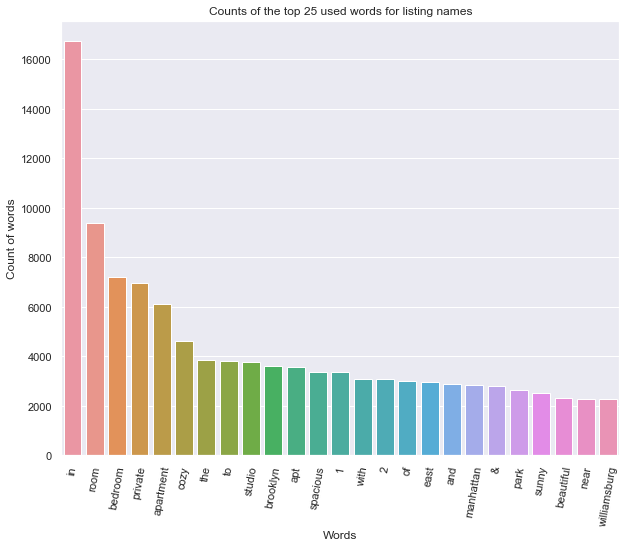

In [73]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

In [74]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [75]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [76]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4
